#🛠️ Preparación de los Datos

##Extracción del Archivo Tratado


#####Carga el archivo CSV que contiene los datos tratados anteriormente.
#####📂 Atención: Utiliza el mismo archivo que limpiaste y organizaste en la Parte 1 del desafío Telecom X. Debe contener solo las columnas relevantes, ya con los datos corregidos y estandarizados.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Pandas/csv_tratado.csv')

df.sample(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
1880,2725-KXXWT,yes,male,0,yes,no,1,yes,no,fiber optic,...,no,no,yes,yes,month to month,yes,electronic check,90.75,90.75,3.02
1010,1456-TWCGB,no,male,0,no,no,4,yes,no,dsl,...,no,no,no,no,month to month,no,mailed check,49.25,208.45,1.64
6765,9605-WGJVW,no,female,1,no,no,1,yes,no,fiber optic,...,no,no,no,no,month to month,yes,electronic check,70.20,70.20,2.34
6526,9258-CNWAC,no,female,0,yes,yes,71,yes,yes,fiber optic,...,yes,yes,yes,yes,two year,no,credit card automatic,113.65,8166.80,3.79
2465,3525-DVKFN,no,female,0,no,no,17,yes,no,no,...,no internet service,no internet service,no internet service,no internet service,two year,no,mailed check,19.40,358.05,0.65


In [ ]:
df.shape

(7043, 22)

##Eliminación de Columnas Irrelevantes

#####Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.

Variables categóricas

In [ ]:
df.describe(include='O')

,customerID,Churn,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,9995-HOTOH,no,male,no,no,yes,no,fiber optic,no,no,no,no,no,no,month to month,yes,electronic check
freq,1,5174,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


Variables numéricas

In [ ]:
df.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,2.158675
std,0.368612,24.559481,30.090047,2266.771362,1.003088
min,0.000000,0.000000,18.250000,18.800000,0.610000
25%,0.000000,9.000000,35.500000,401.450000,1.180000
50%,0.000000,29.000000,70.350000,1397.475000,2.340000
75%,0.000000,55.000000,89.850000,3794.737500,2.990000
max,1.000000,72.000000,118.750000,8684.800000,3.960000


In [ ]:
columnas_a_eliminar = ['customerID','gender','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Cuentas_Diarias']
columnas_existentes = [col for col in columnas_a_eliminar if col in df.columns]
df = df.drop(columnas_existentes, axis=1)
df['Charges.Total'].fillna(df['Charges.Total'].median(), inplace=True)
df.sample(5)

/tmp/ipython-input-6-3007801203.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Charges.Total'].fillna(df['Charges.Total'].median(), inplace=True)


,Churn,SeniorCitizen,Partner,Dependents,tenure,InternetService,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
357,yes,0,yes,no,30,fiber optic,month to month,yes,electronic check,85.00,2624.25
1322,yes,1,no,no,14,fiber optic,month to month,yes,electronic check,78.95,1101.85
6378,yes,0,no,no,39,dsl,month to month,yes,credit card automatic,48.95,1880.85
2798,no,0,no,no,8,no,month to month,yes,bank transfer automatic,19.70,168.90
2460,yes,0,no,no,37,dsl,month to month,yes,electronic check,64.75,2345.20


In [ ]:
df.shape

(7043, 11)

##Encoding

#####Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [ ]:
X

,SeniorCitizen,Partner,Dependents,tenure,InternetService,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0,yes,yes,9,dsl,one year,yes,mailed check,65.60,593.30
1,0,no,no,9,dsl,month to month,no,mailed check,59.90,542.40
2,0,no,no,4,fiber optic,month to month,yes,electronic check,73.90,280.85
3,1,yes,no,13,fiber optic,month to month,yes,electronic check,98.00,1237.85
4,1,yes,no,3,fiber optic,month to month,yes,mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...
7038,0,no,no,13,dsl,one year,no,mailed check,55.15,742.90
7039,0,yes,no,22,fiber optic,month to month,yes,electronic check,85.10,1873.70
7040,0,no,no,2,dsl,month to month,yes,mailed check,50.30,92.75
7041,0,yes,yes,67,dsl,two year,no,mailed check,67.85,4627.65


In [ ]:
y

,Churn
0,no
1,no
2,yes
3,yes
4,yes
...,...
7038,no
7039,yes
7040,no
7041,no


Transformación

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
columnas = X.columns

In [ ]:
columnas_a_transformar = ['SeniorCitizen','Partner','Dependents','InternetService','Contract','PaperlessBilling','PaymentMethod']
one_hot = make_column_transformer((OneHotEncoder(drop='if_binary'),
                                   columnas_a_transformar),
                                   remainder='passthrough',
                                   sparse_threshold=0,
                                  force_int_remainder_cols=False)

In [ ]:
X = one_hot.fit_transform(X)

In [ ]:
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__SeniorCitizen_1', 'onehotencoder__Partner_yes',
       'onehotencoder__Dependents_yes',
       'onehotencoder__InternetService_dsl',
       'onehotencoder__InternetService_fiber optic',
       'onehotencoder__InternetService_no',
       'onehotencoder__Contract_month to month',
       'onehotencoder__Contract_one year',
       'onehotencoder__Contract_two year',
       'onehotencoder__PaperlessBilling_yes',
       'onehotencoder__PaymentMethod_bank transfer  automatic ',
       'onehotencoder__PaymentMethod_credit card  automatic ',
       'onehotencoder__PaymentMethod_electronic check',
       'onehotencoder__PaymentMethod_mailed check', 'remainder__tenure',
       'remainder__Charges.Monthly', 'remainder__Charges.Total'],
      dtype=object)

In [ ]:
pd.DataFrame(X, columns=one_hot.get_feature_names_out(columnas))

,onehotencoder__SeniorCitizen_1,onehotencoder__Partner_yes,onehotencoder__Dependents_yes,onehotencoder__InternetService_dsl,onehotencoder__InternetService_fiber optic,onehotencoder__InternetService_no,onehotencoder__Contract_month to month,onehotencoder__Contract_one year,onehotencoder__Contract_two year,onehotencoder__PaperlessBilling_yes,onehotencoder__PaymentMethod_bank transfer automatic,onehotencoder__PaymentMethod_credit card automatic,onehotencoder__PaymentMethod_electronic check,onehotencoder__PaymentMethod_mailed check,remainder__tenure,remainder__Charges.Monthly,remainder__Charges.Total
0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,65.60,593.30
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,59.90,542.40
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4.0,73.90,280.85
3,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,13.0,98.00,1237.85
4,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,55.15,742.90
7039,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,22.0,85.10,1873.70
7040,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,50.30,92.75
7041,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,67.0,67.85,4627.65


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
y = label_encoder.fit_transform(y)

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

##Verificación de la Proporción de Cancelación (Churn)

#####Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

In [ ]:
y_series = pd.Series(y)
print(y_series.value_counts())

0    5174
1    1869
Name: count, dtype: int64


In [ ]:
print(y_series.value_counts(normalize=True))

0    0.73463
1    0.26537
Name: proportion, dtype: float64


##Balanceo de Clases (opcional)

#####Si deseas profundizar en el análisis, aplica técnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
overSampling = SMOTE()
X_Balanceada, y_Balanceada = overSampling.fit_resample(X, y)

##Normalización o Estandarización (si es necesario)

#####Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
normalizador = MinMaxScaler()

In [ ]:
X_normalizada = normalizador.fit_transform(X)

In [ ]:
pd.DataFrame(X_normalizada)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.125000,0.471144,0.066294
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.125000,0.414428,0.060420
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.055556,0.553731,0.030239
3,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.180556,0.793532,0.140670
4,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.041667,0.653234,0.028687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.180556,0.367164,0.083556
7039,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.305556,0.665174,0.214043
7040,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.027778,0.318905,0.008533
7041,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.930556,0.493532,0.531831


#🎯 Correlación y Selección de Variables

##Análisis de Correlación

#####Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

In [ ]:
X_columnas = one_hot.get_feature_names_out(columnas)
X_df = pd.DataFrame(X, columns=X_columnas)
y_series = pd.Series(y, name='y', index=X_df.index)
X_combinada = pd.concat([X_df, y_series], axis=1)
X_combinada.sample(5)

,onehotencoder__SeniorCitizen_1,onehotencoder__Partner_yes,onehotencoder__Dependents_yes,onehotencoder__InternetService_dsl,onehotencoder__InternetService_fiber optic,onehotencoder__InternetService_no,onehotencoder__Contract_month to month,onehotencoder__Contract_one year,onehotencoder__Contract_two year,onehotencoder__PaperlessBilling_yes,onehotencoder__PaymentMethod_bank transfer automatic,onehotencoder__PaymentMethod_credit card automatic,onehotencoder__PaymentMethod_electronic check,onehotencoder__PaymentMethod_mailed check,remainder__tenure,remainder__Charges.Monthly,remainder__Charges.Total,y
6642,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,76.2,76.20,1
1032,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,53.0,85.7,4616.10,0
1933,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,25.0,26.8,733.55,0
423,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,10.0,29.6,299.05,0
4430,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,69.0,95.2,6671.70,0


In [ ]:
var_numericas_con_y = ['remainder__tenure', 'remainder__Charges.Monthly', 'remainder__Charges.Total', 'y']
corr_con_y = X_combinada[var_numericas_con_y].corr()
corr_con_y

,remainder__tenure,remainder__Charges.Monthly,remainder__Charges.Total,y
remainder__tenure,1.000000,0.247900,0.825464,-0.352229
remainder__Charges.Monthly,0.247900,1.000000,0.650864,0.193356
remainder__Charges.Total,0.825464,0.650864,1.000000,-0.199037
y,-0.352229,0.193356,-0.199037,1.000000


In [ ]:
import plotly.express as px

In [ ]:
px.imshow(corr_con_y, text_auto=True)

In [ ]:
correlaciones = {}
var_numericas = ['remainder__tenure', 'remainder__Charges.Monthly', 'remainder__Charges.Total']
for i in var_numericas:
  correlaciones[i] = X_combinada[['y', i]].corr().iloc[0,1]
  print(f'La correlación entre "y" y {i} es: {correlaciones[i]}')

La correlación entre "y" y remainder__tenure es: -0.3522286701130792
La correlación entre "y" y remainder__Charges.Monthly es: 0.193356422237847
La correlación entre "y" y remainder__Charges.Total es: -0.19903683186929266


##Análisis Dirigido

#####Investiga cómo variables específicas se relacionan con la cancelación, tales como:

Tiempo de contrato × Cancelación

Gasto total × Cancelación

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def trazar_boxplot(columna, titulo):
  fig = px.box(X_combinada, x=columna, color='y', title=titulo)
  fig.show()

In [ ]:
def trazar_histplot(columna, label):
  ax = sns.histplot(X_combinada[columna], kde=True, color='darkslateblue')
  fig = ax.get_figure()
  fig.set_size_inches(20, 6)
  fig.suptitle('Distribución de frecuencias', fontsize=16)
  ax.set_xlabel(label, fontsize=14)
  plt.show()

In [ ]:
trazar_boxplot('remainder__tenure', 'Tiempo de Contrato vs Cancelación')

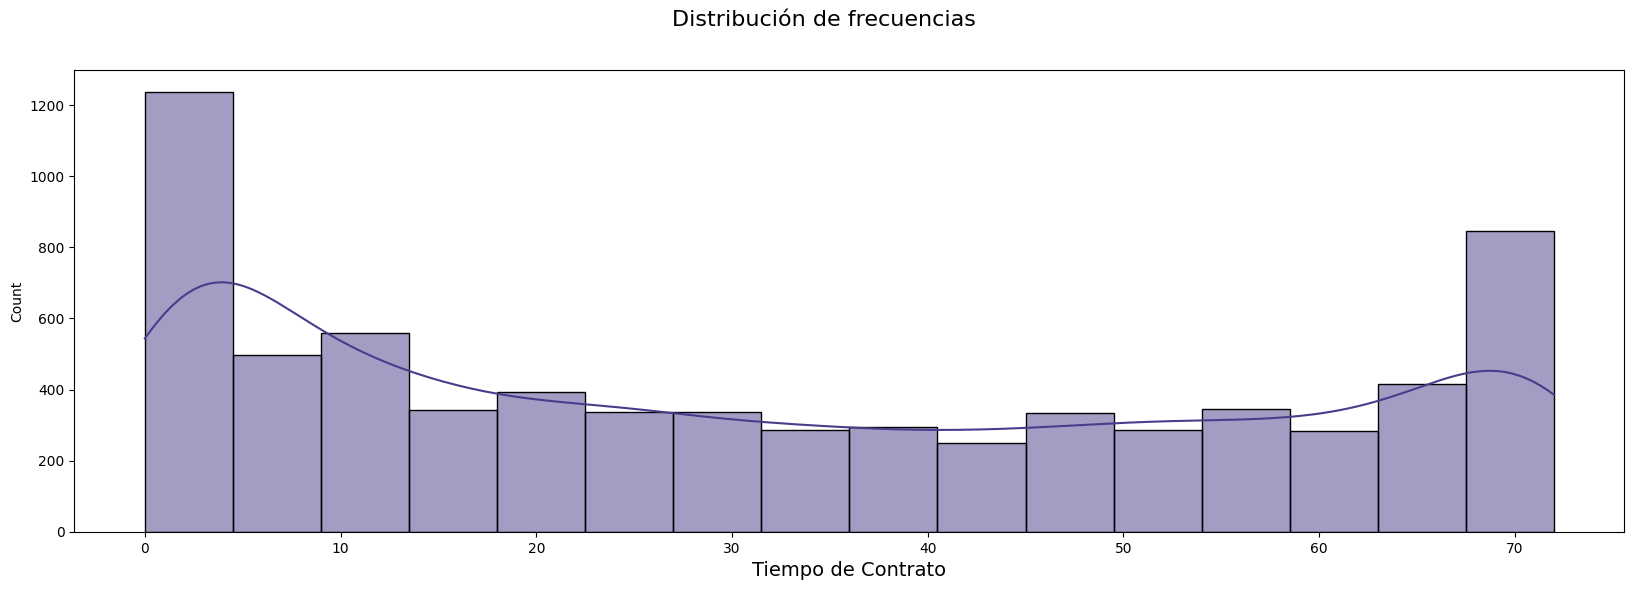

In [ ]:
trazar_histplot('remainder__tenure', 'Tiempo de Contrato')

In [ ]:
trazar_boxplot('remainder__Charges.Monthly', 'Gasto Mensual vs Cancelación')

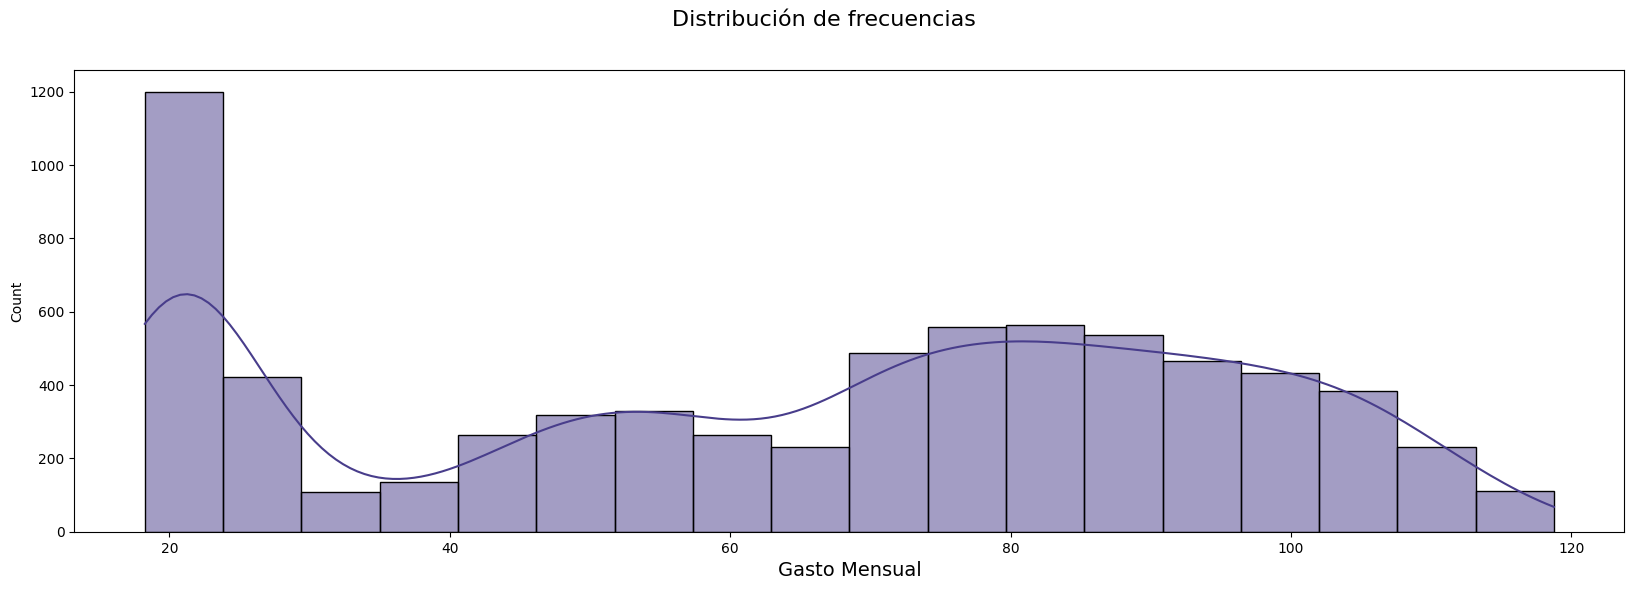

In [ ]:
trazar_histplot('remainder__Charges.Monthly', 'Gasto Mensual')

In [ ]:
trazar_boxplot('remainder__Charges.Total', 'Gasto Total vs Cancelación')

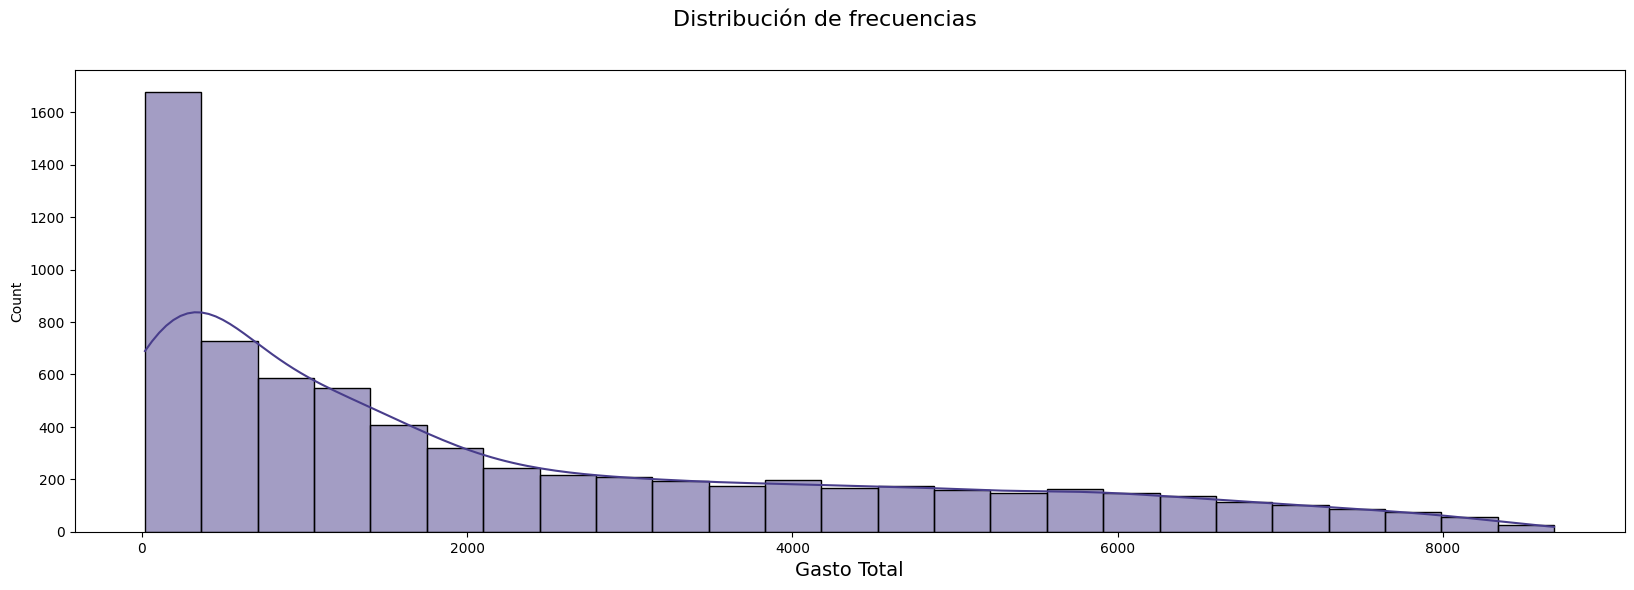

In [ ]:
trazar_histplot('remainder__Charges.Total', 'Gasto Total')

#🤖 Modelado Predictivo

##Separación de Datos

#####Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train_normalizada, X_test_normalizada, y_train, y_test = train_test_split(X_normalizada, y, test_size=0.3, random_state=5)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

Modelo Dummy

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
dummy = DummyClassifier()

In [ ]:
dummy.fit(X_train_normalizada, y_train)

dummy.score(X_test_normalizada, y_test)

0.7392333175579744

In [ ]:
dummy.fit(X_train, y_train)

dummy.score(X_test, y_test)

0.7392333175579744

##Creación de Modelos

#####Crea al menos dos modelos diferentes para predecir la cancelación de clientes.

Un modelo puede requerir normalización, como Regresión Logística o KNN.

El otro modelo puede no requerir normalización, como Árbol de Decisión o Random Forest.

💡 La decisión de aplicar o no la normalización depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalización, pero también es una opción combinar modelos con y sin normalización.

Justificación:

Regresión Logística / KNN: Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.

Árbol de Decisión / Random Forest: Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.

Si decides normalizar los datos, deberías explicar cómo esta etapa asegura que los modelos basados en distancia o en optimización de parámetros no se vean sesgados por la magnitud de las variables.

Modelo KNN

In [ ]:
from sklearn.neighbors import  KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train_normalizada, y_train)

knn.score(X_test_normalizada, y_test)

0.7695220066256507

Modelo Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
modelo_bosque = RandomForestClassifier(random_state=5)
modelo_bosque.fit(X_train, y_train)
modelo_bosque.score(X_test, y_test)

0.7714150496923805

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

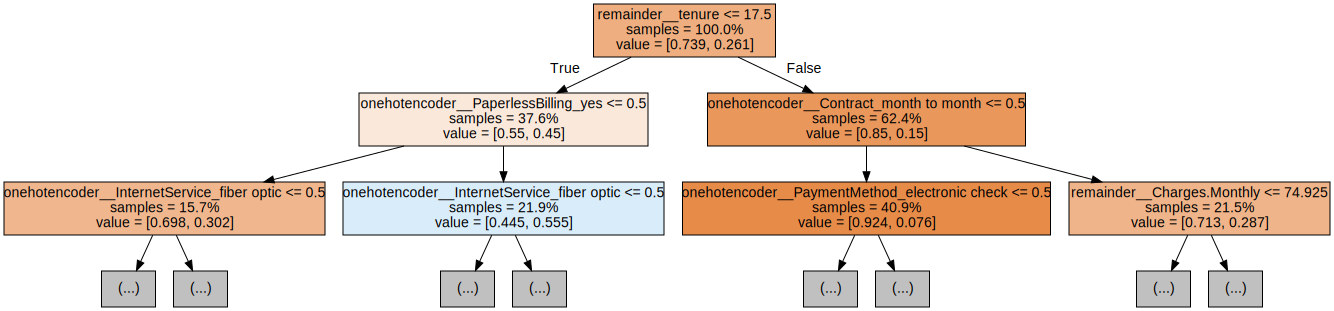

In [ ]:
for i in range(3):
  arbol = modelo_bosque.estimators_[i]
  dot_data = export_graphviz(arbol,
                             feature_names=X_columnas,
                             filled=True,
                             max_depth=2,
                             impurity=False,
                             proportion=True)
graph = graphviz.Source(dot_data)
display(graph)

In [ ]:
modelo_bosque.score(X_train, y_train)

0.9971602434077079

Eligiendo el mejor modelo

In [ ]:
lista = [('dummy', dummy, X_test_normalizada),('knn', knn, X_test_normalizada),('de bosque', modelo_bosque, X_test)]
for i in lista:
  print(f'La exactitud del modelo {i[0]} es: {i[1].score(i[2], y_test)}')

La exactitud del modelo dummy es: 0.7392333175579744
La exactitud del modelo knn es: 0.7695220066256507
La exactitud del modelo de bosque es: 0.7714150496923805


In [ ]:
import pickle

In [ ]:
with open('modelo_onehotencoder.pkl', 'wb') as archivo:
  pickle.dump(one_hot, archivo)

In [ ]:
with open('modelo_champion.pkl', 'wb') as archivo:
  pickle.dump(modelo_bosque, archivo)

##Evaluación de los Modelos

#####Evalúa cada modelo utilizando las siguientes métricas:

Exactitud (Acurácia)

Precisión

Recall

F1-score

Matriz de confusión

Después, realiza un análisis crítico y compara los modelos:

¿Cuál modelo tuvo el mejor desempeño?

¿Algún modelo presentó overfitting o underfitting? Si es así, considera las posibles causas y ajustes:

Overfitting: Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.

Underfitting: Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado simple. Intenta aumentar la complejidad del modelo o ajustar sus parámetros.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_Balanceada, X_test, y_Balanceada, y_test = train_test_split(X_Balanceada, y_Balanceada, test_size=0.15, stratify=y_Balanceada, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X_Balanceada, y_Balanceada, test_size=0.15, stratify=y_Balanceada, random_state=5)

In [ ]:
modeloDummy = DummyClassifier()
modeloKNN = KNeighborsClassifier()
modeloBosque = RandomForestClassifier(max_depth=10)

In [ ]:
lista = [modeloDummy, modeloKNN, modeloBosque]

In [ ]:
for i in lista:
  i.fit(X_train, y_train)

In [ ]:
lista = [('Dummy', modeloDummy),('KNN', modeloKNN),('RandomForest', modeloBosque)]

In [ ]:
for nombre, modelo in lista:
  print(f'La exactitud del modelo {nombre} con el conjunto de entrenamiento es de: {modelo.score(X_train, y_train)}')
  print(f'La exactitud del modelo {nombre} con el conjunto de validación es de: {modelo.score(X_val, y_val)}')

La exactitud del modelo Dummy con el conjunto de entrenamiento es de: 0.500066889632107
La exactitud del modelo Dummy con el conjunto de validación es de: 0.5
La exactitud del modelo KNN con el conjunto de entrenamiento es de: 0.8346488294314381
La exactitud del modelo KNN con el conjunto de validación es de: 0.7689393939393939
La exactitud del modelo RandomForest con el conjunto de entrenamiento es de: 0.888561872909699
La exactitud del modelo RandomForest con el conjunto de validación es de: 0.8431818181818181


Evaluación de Matriz de Confusión

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_previsto = {}
matriz_confusion = {}
for i in lista:
  y_previsto[i[0]] = i[1].predict(X_val)
  matriz_confusion[i[0]] = confusion_matrix(y_val, y_previsto[i[0]])
  print(f'La matriz de confusión del modelo {i[0]} es: \n{matriz_confusion[i[0]]}')

La matriz de confusión del modelo Dummy es: 
[[660   0]
 [660   0]]
La matriz de confusión del modelo KNN es: 
[[466 194]
 [111 549]]
La matriz de confusión del modelo RandomForest es: 
[[546 114]
 [ 93 567]]


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
def trazar_matriz(nombre):
  fig = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion[nombre], display_labels=['Cliente leal', 'Cliente Churn'])
  fig.plot()

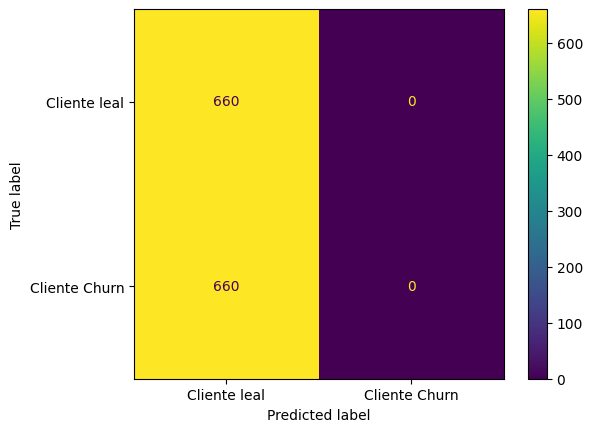

In [ ]:
trazar_matriz('Dummy')

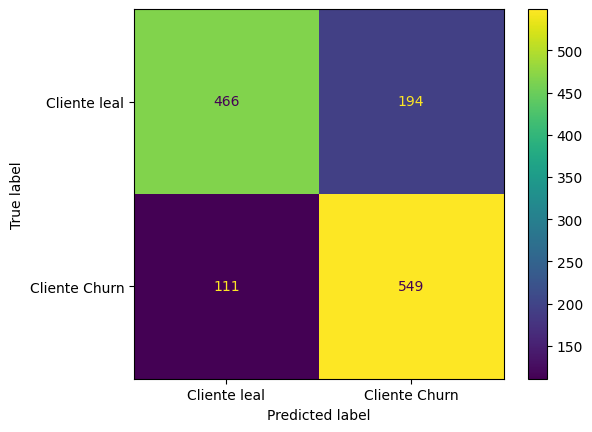

In [ ]:
trazar_matriz('KNN')

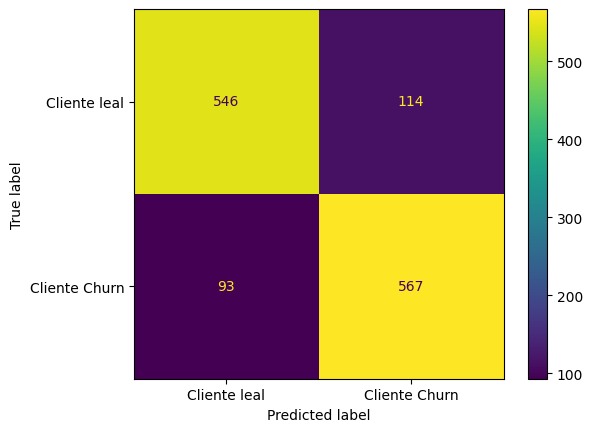

In [ ]:
trazar_matriz('RandomForest')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Evaluación de Precisión

In [ ]:
for i in y_previsto:
  print(f'La precisión del modelo {i} es de: {precision_score(y_val, y_previsto[i])}')

La precisión del modelo Dummy es de: 0.0
La precisión del modelo KNN es de: 0.7388963660834454
La precisión del modelo RandomForest es de: 0.8325991189427313


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



Evaluación Recall

In [ ]:
for i in y_previsto:
  print(f'La sensibilidad (Recall) del modelo {i} es de: {recall_score(y_val, y_previsto[i])}')

La sensibilidad (Recall) del modelo Dummy es de: 0.0
La sensibilidad (Recall) del modelo KNN es de: 0.8318181818181818
La sensibilidad (Recall) del modelo RandomForest es de: 0.8590909090909091


Evaluación de Exactitud

In [ ]:
for i in y_previsto:
  print(f'La exactitud (accuracy) del modelo {i} es de: {accuracy_score(y_val, y_previsto[i])}')

La exactitud (accuracy) del modelo Dummy es de: 0.5
La exactitud (accuracy) del modelo KNN es de: 0.7689393939393939
La exactitud (accuracy) del modelo RandomForest es de: 0.8431818181818181


Evaluación F1

In [ ]:
for i in y_previsto:
  print(f'El F1-score del modelo {i} es de: {f1_score(y_val, y_previsto[i])}')

El F1-score del modelo Dummy es de: 0.0
El F1-score del modelo KNN es de: 0.782608695652174
El F1-score del modelo RandomForest es de: 0.8456375838926175


Reporte de métricas

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
for i in y_previsto:
  print(f'El reporte de métricas del modelo {i} es: \n{classification_report(y_val, y_previsto[i])}')

El reporte de métricas del modelo Dummy es: 
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       660
           1       0.00      0.00      0.00       660

    accuracy                           0.50      1320
   macro avg       0.25      0.50      0.33      1320
weighted avg       0.25      0.50      0.33      1320

El reporte de métricas del modelo KNN es: 
              precision    recall  f1-score   support

           0       0.81      0.71      0.75       660
           1       0.74      0.83      0.78       660

    accuracy                           0.77      1320
   macro avg       0.77      0.77      0.77      1320
weighted avg       0.77      0.77      0.77      1320

El reporte de métricas del modelo RandomForest es: 
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       660
           1       0.83      0.86      0.85       660

    accuracy                           0.8

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Resumen

In [ ]:
oversampling = SMOTE()
X_Balanceada, y_Balanceada = oversampling.fit_resample(X, y)

In [ ]:
modeloDummy = DummyClassifier()
modeloKNN = KNeighborsClassifier()
modeloBosque = RandomForestClassifier(max_depth=10)

for i in [modeloDummy, modeloKNN, modeloBosque]:
  i.fit(X_Balanceada, y_Balanceada)

y_previsto = {}
matriz_confusion = {}
for i in [modeloDummy, modeloKNN, modeloBosque]:
  y_previsto[i] = i.predict(X_test)

In [ ]:
for i in y_previsto:
  print(classification_report(y_test, y_previsto[i]))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       776
           1       0.00      0.00      0.00       777

    accuracy                           0.50      1553
   macro avg       0.25      0.50      0.33      1553
weighted avg       0.25      0.50      0.33      1553

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       776
           1       0.80      0.86      0.83       777

    accuracy                           0.82      1553
   macro avg       0.82      0.82      0.82      1553
weighted avg       0.82      0.82      0.82      1553

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       776
           1       0.88      0.89      0.88       777

    accuracy                           0.88      1553
   macro avg       0.88      0.88      0.88      1553
weighted avg       0.88      0.88      0.88      1553



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
def trazar_matriz_resumen(i):
  fig = ConfusionMatrixDisplay.from_predictions(y_test, y_previsto[i], display_labels=['Cliente leal', 'Cliente Churn'])
  fig.figure_.suptitle(f'Matriz de confusión del modelo {i}', fontsize=16)
  plt.show()

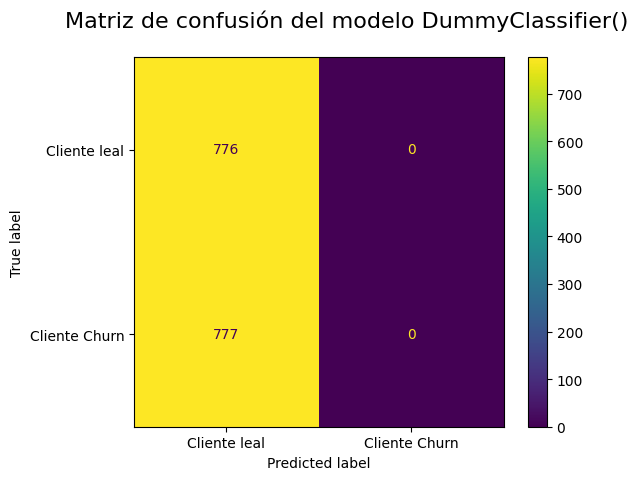

In [ ]:
trazar_matriz_resumen(modeloDummy)

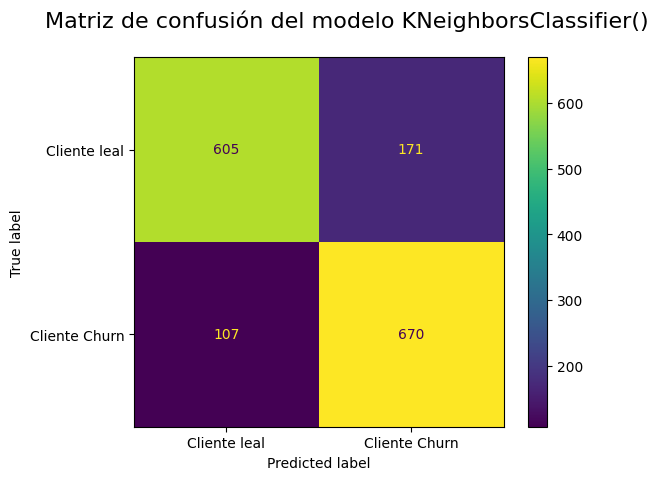

In [ ]:
trazar_matriz_resumen(modeloKNN)

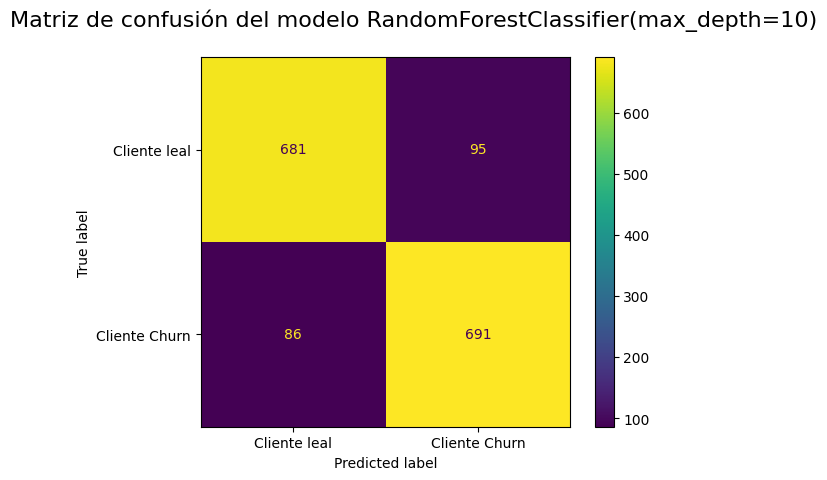

In [ ]:
trazar_matriz_resumen(modeloBosque)

#📋 Interpretación y Conclusiones

##Análisis de la Importancia de las Variables

#####Después de elegir los modelos, realiza el análisis de las variables más relevantes para la predicción de la cancelación:

Regresión Logística: Investiga los coeficientes de las variables, que muestran su contribución a la predicción de cancelación.

KNN (K-Nearest Neighbors): Observa cómo los vecinos más cercanos influyen en la decisión de clasificación. Las variables más impactantes pueden ser aquellas que más contribuyen a la proximidad entre los puntos de datos.

Random Forest: Utiliza la importancia de las variables proporcionada por el modelo. Random Forest calcula la importancia basándose en cómo cada variable contribuye a la reducción de la impureza durante las divisiones de los árboles.

SVM (Support Vector Machine): En el SVM, las variables más relevantes son aquellas que influyen en la frontera de decisión entre las clases. Puedes analizar los coeficientes de los vectores de soporte para entender qué variables tienen mayor impacto.

Otros Modelos: Dependiendo del modelo elegido, considera el análisis de métricas específicas para comprender la relevancia de las variables. Por ejemplo, coeficientes en modelos lineales, pesos en redes neuronales, o la importancia relativa en técnicas de boosting (como XGBoost).

Número de atributos

In [ ]:
len(X_df.columns)

17

Modelo KNN (K-Nearest Neighbors)

In [ ]:
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 30.6 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import cross_val_score
from mglearn import plots
from mglearn import discrete_scatter
import numpy as np

In [ ]:
def trazar_barras(cv):
  plt.figure(figsize=(8, 4))
  plt.bar(range(1, 6), cv, color='mediumslateblue')
  plt.axhline(np.mean(cv), color='red', linestyle='--')
  plt.title('Puntuaciones de validación cruzada\nLinea roja: Precisión promedio')
  plt.xlabel('Fold')
  plt.ylabel('Precisión')
  plt.ylim(0, 1)
  plt.show()

In [ ]:
def trazar_barras_bivariada(cv, X_train, X_test, y_train, y_test):
  plt.bar(['Entrenamiento','Prueba'], [cv.score(X_train, y_train), cv.score(X_test, y_test)], color=['mediumseagreen','mediumslateblue'])
  plt.ylim(0, 1)
  plt.title('Comparación de Precisión : Entrenamiento vs Prueba')
  plt.ylabel('Precisión')
  plt.show()

In [ ]:
X_train_normalizada, X_test_normalizada, y_train, y_test = train_test_split(X_normalizada, y, test_size=0.3, random_state=5)

n_neighbors = 1
clf_knn = KNeighborsClassifier(n_neighbors=n_neighbors)
clf_knn.fit(X_train_normalizada, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
cv_knn = cross_val_score(clf_knn, X_train_normalizada, y_train, cv=5, scoring='accuracy')

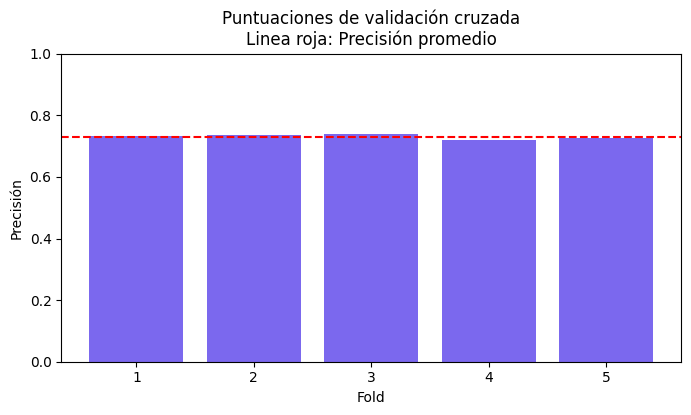

In [ ]:
trazar_barras(cv_knn)

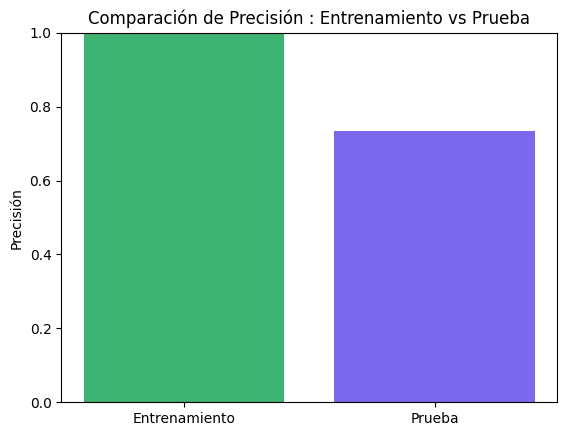

In [ ]:
trazar_barras_bivariada(clf_knn, X_train_normalizada, X_test_normalizada, y_train, y_test)

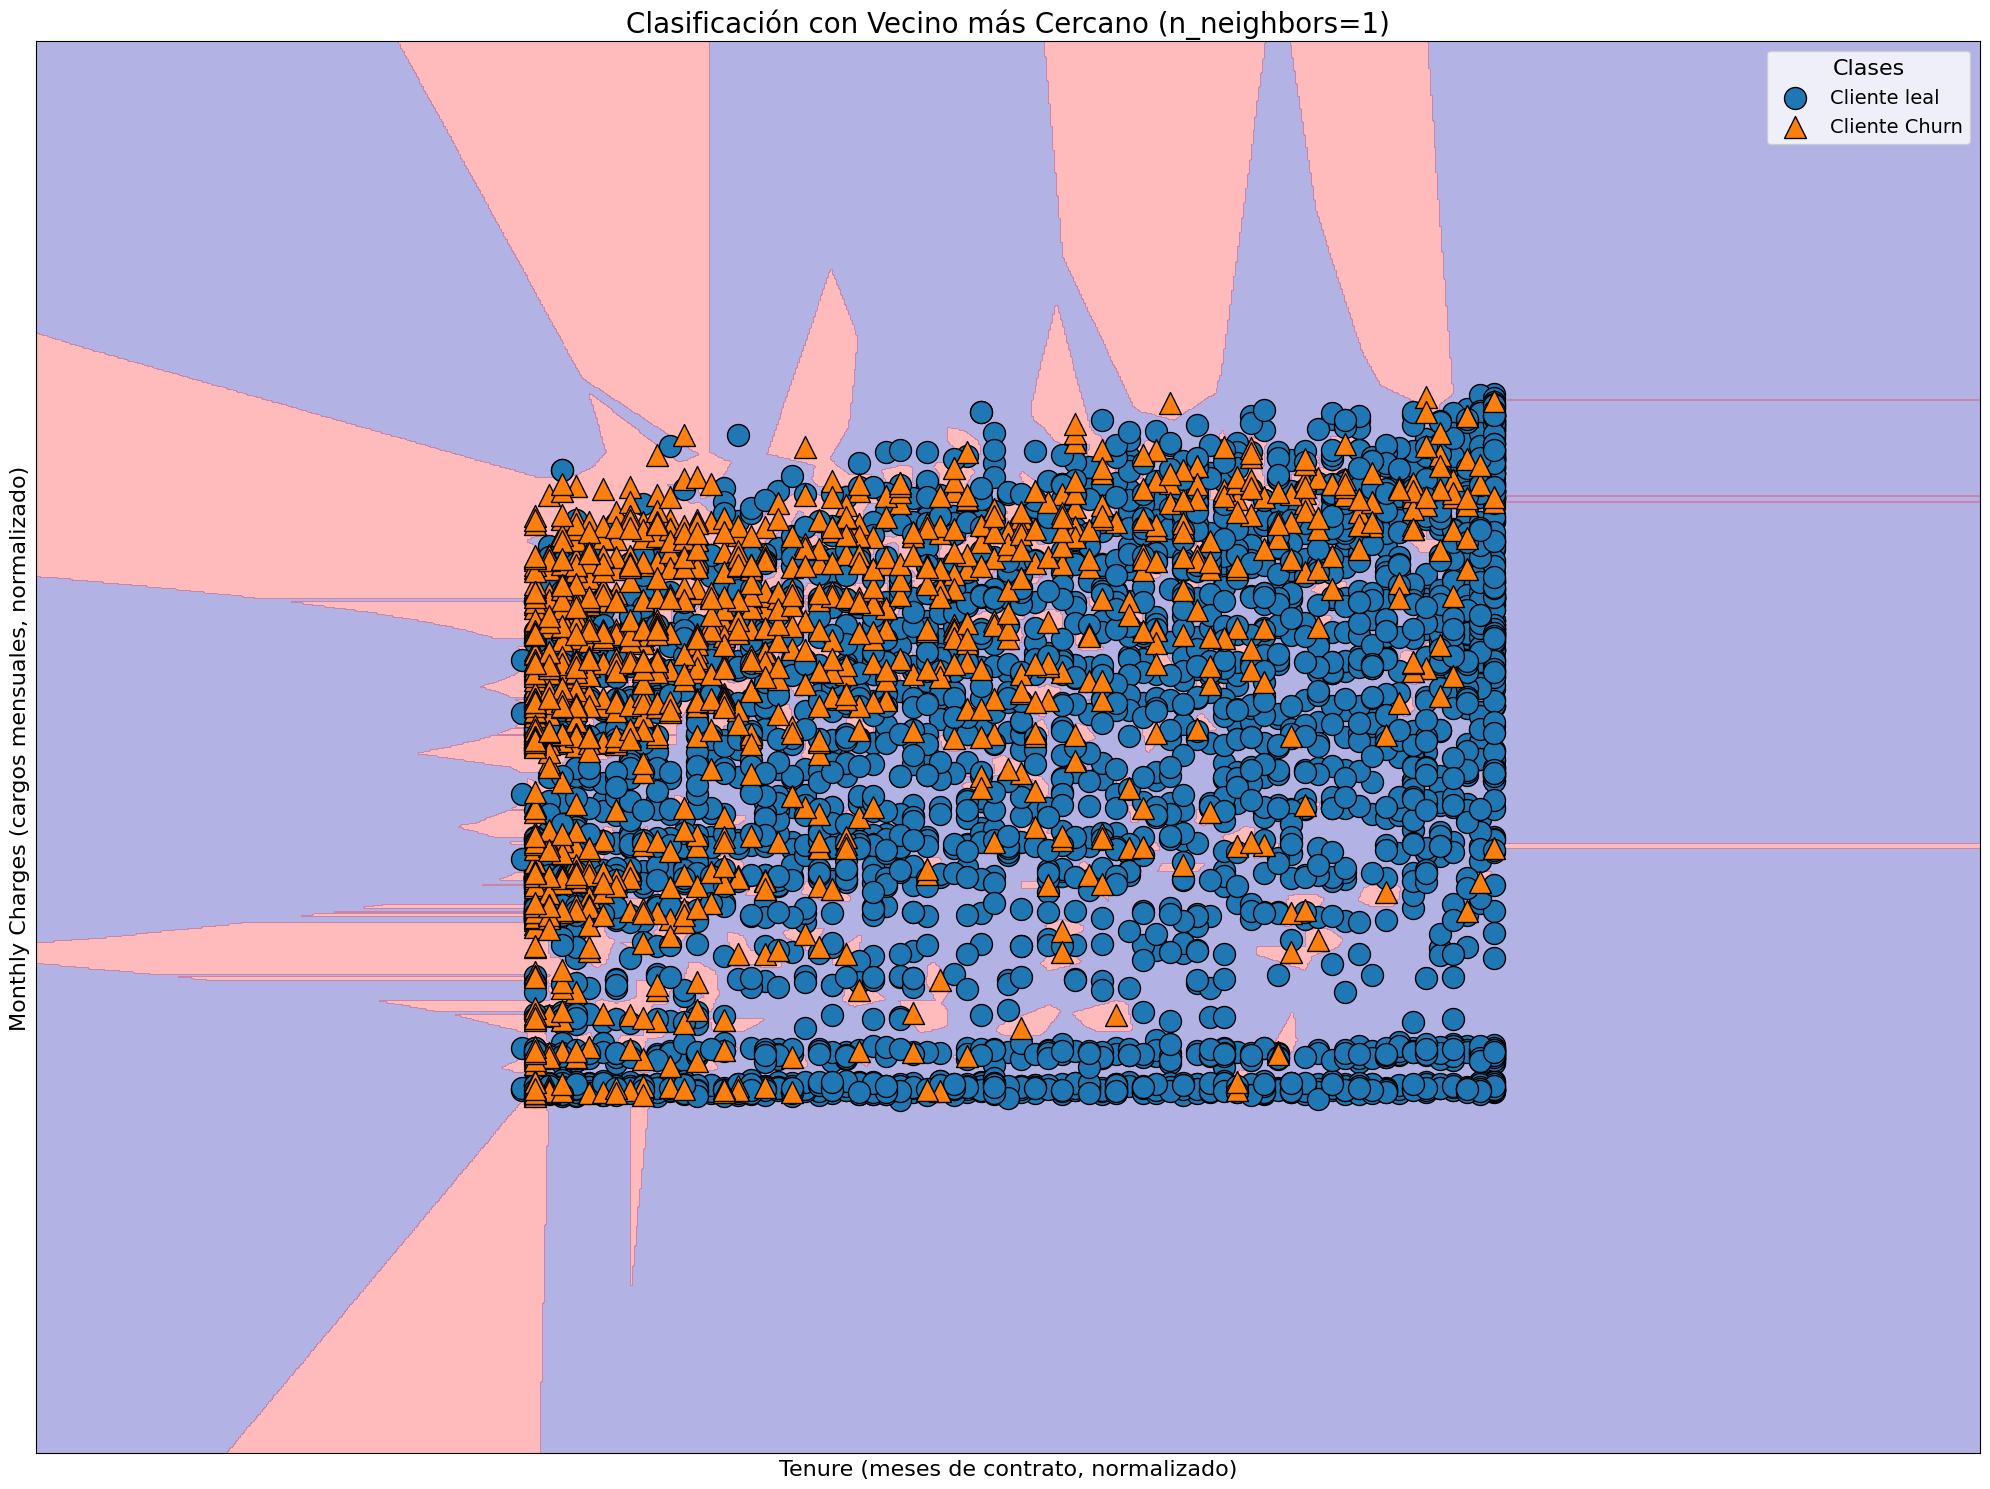

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))

clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train_normalizada[:, [14, 15]], y_train)
import mglearn
mglearn.plots.plot_2d_separator(clf, X_train_normalizada[:, [14, 15]], fill=True, eps=0.5, ax=ax, alpha=.3)

classes = np.unique(y_train)
markers = ['o', '^', 's']
labelknn = ['Cliente leal', 'Cliente Churn']
for class_value, marker in zip(classes, markers):
    mask = (y_train == class_value)
    ax.scatter(
        X_train_normalizada[mask, 14],
        X_train_normalizada[mask, 15],
        marker=marker,
        s=250,
        edgecolor='k',
        label=labelknn[class_value]
    )

ax.set_title(f"Clasificación con Vecino más Cercano (n_neighbors={n_neighbors})", fontsize=20)
ax.set_xlabel("Tenure (meses de contrato, normalizado)", fontsize=16)
ax.set_ylabel("Monthly Charges (cargos mensuales, normalizado)", fontsize=16)
ax.legend(fontsize=14, title="Clases", title_fontsize=16)
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Modelo RandomForest

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

clf_rf = RandomForestClassifier(max_depth=10)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [ ]:
cv_rf = cross_val_score(clf_rf, X_train, y_train, cv=5, scoring='accuracy')

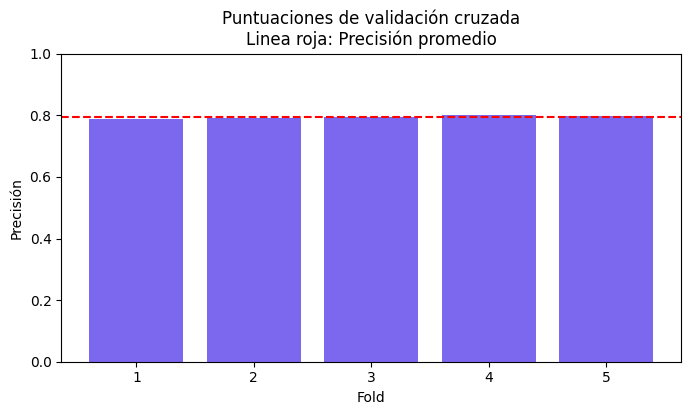

In [ ]:
trazar_barras(cv_rf)

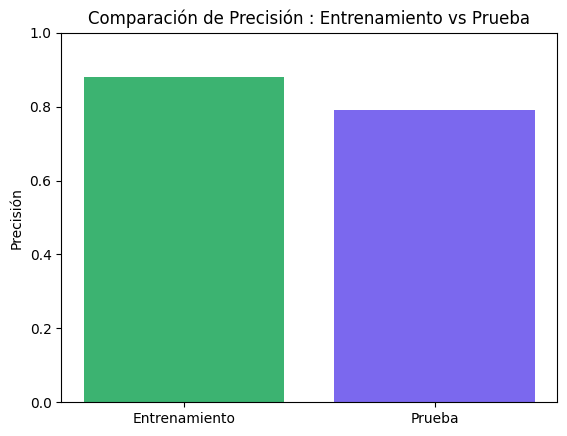

In [ ]:
trazar_barras_bivariada(clf_rf, X_train, X_test, y_train, y_test)

In [ ]:
importances = clf_rf.feature_importances_

In [ ]:
feature_importances = pd.DataFrame({'Features': X_df.columns, 'Importances': (importances * 100).round(2)})
feature_importances = feature_importances.sort_values('Importances', ascending=False)
feature_importances

,Features,Importances
16,remainder__Charges.Total,18.93
14,remainder__tenure,18.90
15,remainder__Charges.Monthly,17.31
6,onehotencoder__Contract_month to month,12.17
4,onehotencoder__InternetService_fiber optic,6.30
12,onehotencoder__PaymentMethod_electronic check,5.04
8,onehotencoder__Contract_two year,4.27
5,onehotencoder__InternetService_no,2.60
9,onehotencoder__PaperlessBilling_yes,2.25
3,onehotencoder__InternetService_dsl,2.10


In [ ]:
resultados = pd.DataFrame(index=['Exactitud', 'Precisión', 'Recall', 'F1'])
modeloBosque_features = RandomForestClassifier(max_depth=10, random_state=5)
ct_features = [i if i != 0 else 1 for i in range(0, 35, 5)]

In [ ]:
for i in ct_features:
  select_features_names = feature_importances['Features'].values[:i]
  select_features_indices = [X_df.columns.get_loc(col) for col in select_features_names]
  X_train_select = X_train[:, select_features_indices]
  X_test_select = X_test[:, select_features_indices]
  modeloBosque_features.fit(X_train_select, y_train)
  y_pred = modeloBosque_features.predict(X_test_select)
  metricas = {'Exactitud': accuracy_score(y_test, y_pred),
              'Precisión': precision_score(y_test, y_pred),
              'Recall': recall_score(y_test, y_pred),
              'F1': f1_score(y_test, y_pred)}
  resultados[i] = list(metricas.values())

resultados

,1,5,10,15,20,25,30
Exactitud,0.746805,0.784666,0.786559,0.791765,0.790819,0.790819,0.790819
Precisión,0.548780,0.609589,0.608225,0.621444,0.619256,0.619256,0.619256
Recall,0.163339,0.484574,0.509982,0.515426,0.513612,0.513612,0.513612
F1,0.251748,0.539939,0.554788,0.563492,0.561508,0.561508,0.561508


In [ ]:
selected_features = feature_importances['Features'].values[:10]
select_features_indices = [X_df.columns.get_loc(col) for col in selected_features]
X_selected_features = X_train[:, select_features_indices]

In [ ]:
select_features_names = feature_importances['Features'].values[:10]
select_features_indices = [X_df.columns.get_loc(col) for col in select_features_names]
X_selected_features = X[:, select_features_indices]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y, random_state=42)

In [ ]:
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'n_estimators': [100, 150, 200]
}

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold

In [ ]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
model_grid = GridSearchCV(RandomForestClassifier(random_state=42),
                          param_grid=param_grid, scoring='accuracy', cv=cv)

In [ ]:
model_grid.fit(X_train, y_train)

In [ ]:
model_grid.best_params_

In [ ]:
y_pred_grid = model_grid.predict(X_test)
metricas_model_grid = {'Exactitud': accuracy_score(y_test, y_pred_grid),
              'Precisión': precision_score(y_test, y_pred_grid),
              'Recall': recall_score(y_test, y_pred_grid),
              'F1': f1_score(y_test, y_pred_grid)}

metricas_model_grid

In [ ]:
resultados['Grid'] = list(metricas_model_grid.values())
resultados

In [ ]:
trazar_barras_bivariada(model_grid, X_train, X_test, y_train, y_test)

In [ ]:
try:
  with open('champion.pkl', 'wb') as archivo:
    pickle.dump(model_grid.best_estimator_, archivo)
except:
  print('Se presentó un error al almacenar el modelo: ', str(e))

##Conclusión

#####Elaboren un informe detallado, destacando los factores que más influyen en la cancelación, basándose en las variables seleccionadas y en el rendimiento de cada modelo.

#####Identifiquen los principales factores que afectan la cancelación de clientes y propongan estrategias de retención basadas en los resultados obtenidos.

° Introducción:

La creación y evaluación de modelos de Machine Learning tiene el objetivo de desarrollar herramientas que nos ayuden a entender fenómenos y términos de negocio, como el Churn, predecir si un cliente es candidato o no al Churn, por ejemplo, y tomar decisiones basadas en nuestros conjuntos de datos.

Estos modelos tienen la finalidad de ser los más generalizables y útiles posibles para diagnosticar resultados, generalizando nuevos datos a partir de lo aprendido en los datos de entrenamiento y prueba.

Para lograr dicha finalidad, se utiliza principalmente la biblioteca Scikit-learn de Python. Es una herramienta que nos brinda módulos y funciones eficientes en el Aprendizaje Supervisado y Supervisado, como también en análisis de datos y modelado predictivo.

° Correlaciones y separación de datos:

Luego de un tratamiento, transformación, normalización y balanceo de datos, se una investigación de las correlaciones de las variables numéricas y la variable "y".
• "Tenure" & "Charges.Total" de .825;
• "Charges.Total" & "Charges.Monthly" de .65.

Y las correlaciones entre las variables numéricas con la variable "y" fueron:
• "Tenure" & "y" de -.35, con una asimetría a la derecha;
• "Charges.Monthly" & "y" de .19;
• "Charges.Total" & "y" de -.2, también con una simetría a la derecha.


Estos datos demuestran que hay muy escasa o nula relación entre las variables, por lo que no se aplicarían términos de regresión, agregando que la de las variables relevantes son categóricas en formato binario, otra razón por la cuál, la clasificación es lo más recomendable.

° Creación y evaluación de modelos:

Antes de procesar nuestro conjunto de datos en cualquier modelo predictivo que seleccionemos, deben de ser separados, de las variables "X" & "y", a datos de entrenamiento, prueba, y validación para algunas métricas de evaluación. Esto se hace por medio del método train_test_split() del módulo model_selection.

Posteriormente se emplea otra técnico recomendable, que es Baseline, es un modelo predictivo de referencia de clasificación básica de datos, este modelo sirve para compararlo en rendimiento con los modelos predictivos que seleccionemos. Se importa desde el módulo dummy, como DummyClassifier.

Después de éstos pasos, se seleccionan los modelos a utilizar, en este caso, KNN (KNeighborsClassifier()) para datos normalizados, y RandomForest (RandomForestClassifier()) para datos no normalizados. De los módulos neighbors y ensamble.

El modelo KNN sirve para calcular las distancias de los k-puntos en el conjunto de entrenamiento, seleccionarlos y predecir basándose de su clasificación.

Y el modelo RandomForest sirve para clasificar, asignando los datos a variables específicas, es un bosque que clasifica en árboles, basándose en las características de los datos procesados.

Para evaluar adecuadamente en cada uno de los modelos seleccionados, se usan las siguientes métricas, arrojando lo siguiente:
• Exactitud (Acurácida):
    - Dummy con el conjunto de entrenamiento de .5;
    - Dummy con el conjunto de validación de .5;
    - KNN con el conjunto de entrenamiento de .83;
    - KNN con el conjunto de entrenamiento de .76;
    - RandomForest con el conjunto de entrenamiento de .89;
    - RandomForest con el conjunto de entrenamiento de .84;
• Precisión:
    - Dummy de 0;
    - KNN de .73;
    - RandomForest de .83;
• Sensibilidad (Recall):
    - Dummy de 0;
    - KNN de .82;
    - RandomForest de .86;
• F1-score:
    - Dummy de 0;
    - KNN de .77;
    - RandomForest de .84.

En los gráficos de matriz de confusión se muestran los números de los clientes leales:
- Dummy, 776;
- KNN, 615;
- RandomForest, 681;
Y de los números de los clientes "Churn":
- Dummy, 777;
- KNN, 672;
- RandomForest, 689.

Éstas estadísticas indican que el modelo con el mejor rendimiento es el modelo RandomForest.

° Importancia de las variables:

Dentro del área de Machine Learning, hay un término, este es feature importance, se trata de los atributos más importantes de nuestro conjunto de datos para que sean mejor generalizados por el modelo predictivo.

Existe otro término que es feature engineering, una disciplina que se enfoca en buscar y formular los atributos más apropiados en el rendimiento del modelado.

La validación cruzada es otra métrica de evaluación, los gráficos que tratan de las puntuaciones de precisión promedio, indican que los dos modelos KNN y RandomForest tienen un buen rendimiento dentro del límite de la precisión. Los gráficos que tratan de la comparación de precisión, señalan que los datos de entrenamiento y prueba están fuertemente desbalanceados en el modelo KNN y en modelo RandomForest, este desbalance es menor. Por lo que los dos modelos requieren de un balanceo de datos.

Profundizando en el análisis del modelo KNN, en gráfico de clasificación con Vecinos más cercanos, se concentra el cálculo de un k-vecino, y arroja lo siguiente:
• en las correlaciones entre las variables señaladas con la variable respuesta, hay decenas de k-puntos que son los clientes incluidos en dicho espacio;
• hay un mayor número de clientes leales que el de los clientes "Churn";
• la sombra del fondo se divide en dos colores, morado y rosa, el morado representa a los clientes leales y el rosa, a los clientes Churn, indicando que la primera es la que predomina, otro indicio más de que son los clientes leales son la mayoría.

Por otro lado, analizando al modelo RandomForest, existe un método llamado GridSearch del módulo model_selection, sirve para buscar y encontrar los mejores atributos de parámetros, y también para evaluar el rendimiento del modelo, en este caso, de RandomForest. Ya implementada está técnica, el modelo funciona con este desempeño:
- Exactitud, .8;
- Precisión, .7;
- Sensibilidad(recall), .46;
- F1 .55

En un tercer gráfico de validación cruzada, se verifica que el modelo RandomForest_Grid tiene un mejor balanceo de precisión.

Por último, se almacena dicho modelo grid, cómo modelo champion, en un archivo con extensión .pkl

° Conclusión:

Es muy útil comprender tanto el objetivo como las herramientas que empleamos para predecir la cuestión de que si algo es candidato a ser una consecuencia o no, en este caso, ser un cliente leal o Churn, que modelos son más adecuados en generalizar nuestro conjunto de datos, y las técnicas dentro del Machine Learning con las que podamos mejorar el rendimiento de dichos modelos predictivos que seleccionemos.

Cada uno de los pasos es de gran valor, por ejemplo el análisis de las correlaciones entre las variables categóricas, numéricas y de respuesta, debido a que según los resultados que nos arroja podemos determinar si nuestro conjunto de datos requieren de modelos de regresión o de clasificación para su adecuada predicción.

Las métricas de evaluación son muy significativas, pues podemos obtener información del desempeño de uno de los de los modelos empleados, poderlos comparar, saber si necesitan de un balanceo de datos y saber si se generalizan bien los datos o no.

En algunos modelos predictivos, como el RandomForest, también es muy conveniente conocer disciplinas, por ejemplo Feature engineering, y métodos com GridSearch para poder utilizar los mejores atributos de parámetros de nuestro conjunto de datos para afinar su precisión y que estén menos desbalanceados.

El área de Machine Learning es fundamental en tomas de decisiones debido a su capacidad de automatizar y optimizar procesos de datos complejos y relacionados a temas relevantes como la detección de fraudes y seguridad, los avances en diversas industrias (la industria de la salud, por ejemplo), la personalización y experiencia de usuario, y cuestiones de negocios.

° Estrategias de retención:

En base a que hay un exceso de variables categóricas, asimetrías en los gráficos mostrados y en las features (atributos) más importantes, altamente recomiendo:
- ofrecer paquetes de servicios en conjunto con mensualidades fijas y accesibles;
- determinar la mensualidad de los paquetes, calculando los costos de los servicios y con el objetivo de acercarse al promedio de los cargos mensuales de los clientes leales;
- y no ofrecer contratos de largo plazo a potenciales clientes.